(150, 5)
 
 
 


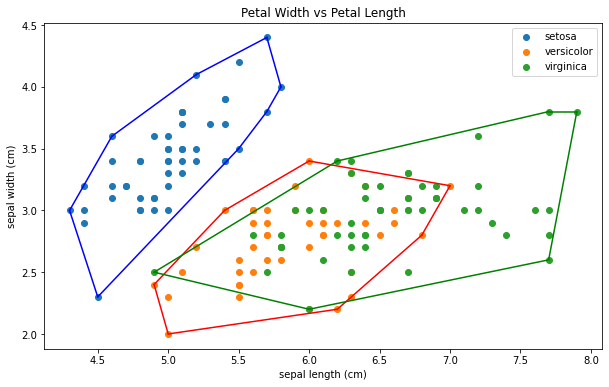

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Partisi digunakan untuk membantu melakukan quicksort
def partisi(bucket,i,j):
    p = i
    q = j
    pivot = bucket[i][0]
    temp_pivot = bucket[i]
    while (p < q):
        while (p<len(bucket) and bucket[p][0]<=pivot):
            p += 1
        while (bucket[q][0]>pivot):
            q -= 1
        if (p < q): 
            temp = bucket[p]
            bucket[p] = bucket[q]
            bucket[q] = temp
    
    temp2 = bucket[q]
    bucket[q] = temp_pivot
    bucket[i] = temp2

    return q

# Quicksort dilakukan untuk nilai absis dari data
def quicksortX(bucket,i,j):
    if (i<j):
        temp = partisi(bucket,i,j)
        quicksortX(bucket,i,temp-1)
        quicksortX(bucket,temp+1,j)

# Selection sort dilakukan untuk nilai ordinat dari data
def sortY(bucket):
    for i in range (0,len(bucket)):
        start = i
        for j in range (i, len(bucket)):
            if(bucket[start][0] == bucket[j][0]):
                end = j

        kecil = bucket[start]
        tempvar = start
        for k in range (start,end+1):
            if(bucket[k][1]<kecil[1]):
                kecil = bucket[k]
                tempvar = k
        
        bucket[tempvar] = bucket[start] 
        bucket[start] = kecil

# Penggabungan quicksort untuk absis dan selection sort untuk ordinat
def sortfinal(bucket,i,j):
    quicksortX(bucket,i,j)
    sortY(bucket)

# Mencari jika titik3 berada di sisi kiri / sisi kanan garis yang dibuat dari titik1 dan titik2
def sisi(titik1,titik2,titik3):
    temp = titik1[0]*titik2[1] + titik3[0]*titik1[1] + titik2[0]*titik3[1]-titik3[0]*titik2[1]-titik2[0]*titik1[1]-titik1[0]*titik3[1]
    if (temp > 0):
        return 1
    if (temp < 0):
        return -1
    return 0

# Mencari jarak titik3 dari garis yang dibuat dari titik1 dan titik2 
def jarak(titik1,titik2,titik3):
    hasil = abs(((titik3[1]-titik1[1])*(titik2[0]-titik1[0])) - ((titik2[1]-titik1[1])*(titik3[0]-titik1[0])))

    return hasil

# Mencari titik yang memiliki jarak terjauh dari titik1 dan titik2
def maxhull (bucket, titik1, titik2):

    max = 0
    maxtitik = -999
    for i in range (0, len(bucket)):
        temp = jarak(titik1,titik2,bucket[i])
        if (temp > max):
            max = temp
            maxtitik = i
        
    if (maxtitik == -999):
        return []
        
        
    return bucket[maxtitik]

# Bagian pencarian convex hull yang akan direkursi
def hull2(bucket, titik1, titik2, titik3):
    # Jika tidak ditemukan titik di luar convex hull maka titik1 dan titik2 dimasukkan ke hasil akhir
    if (len(bucket) == 0 or titik3 == []):
        return [titik1,titik2]

    else :

        left = []
        right = []

        # Melihat jika titik berada di sisi kiri / kanan dan menyimpan titik tersebut di 2 list
        for j in range (0,len(bucket)):
            sisi1 = sisi(titik1,titik3,bucket[j])
            sisi2 = sisi(titik2,titik3,bucket[j])
            if (sisi1 == 1 and sisi2 == 1):
                left.append(bucket[j])
            if (sisi1 == -1 and sisi2 == -1):
                right.append(bucket[j])

        # Mencari titik terjauh dari list hasil pembagian
        nilai1 = maxhull(left,titik1,titik3)
        nilai2 = maxhull(right,titik2,titik3)

        return hull2(left,titik1,titik3,nilai1) + hull2(right,titik3,titik2,nilai2)

        
# Bagian awal dari convex hull
def hull(bucket, titik1, titik2):
    # Jika tidak ditemukan titik di luar convex hull maka titik1 dan titik2 dimasukkan ke hasil akhir
    if (len(bucket) == 0):
        return [titik1,titik2]

    else :

        left = []
        right = []

        # Melihat jika titik berada di sisi kiri / kanan dan menyimpan titik tersebut di 2 list
        for j in range (0,len(bucket)):
            sisi1 = sisi(titik1,titik2,bucket[j])
            if (sisi1 == 1):
                left.append(bucket[j])
            if (sisi1 == -1):
                right.append(bucket[j])
        
        # Mencari titik terjauh dari list hasil pembagian
        nilai1 = maxhull(left,titik1,titik2)
        nilai2 = maxhull(right,titik1,titik2)

        return hull2(left,titik1,titik2,nilai1) + hull2(right,titik2,titik1,nilai2)

# Pemrosesan data menjadi beberapa titik yang akan digambar di convex hull
def hullfinal(bucket):
    sortfinal(bucket,0,len(bucket)-1)
    hasil3 = []
    temp1 = hull(bucket,bucket[0],bucket[len(bucket)-1])
    hasil3 = hasil3 + temp1
    return hasil3

data = datasets.load_iris()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = hullfinal(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
    plt.legend()

(178, 14)
 
 
 


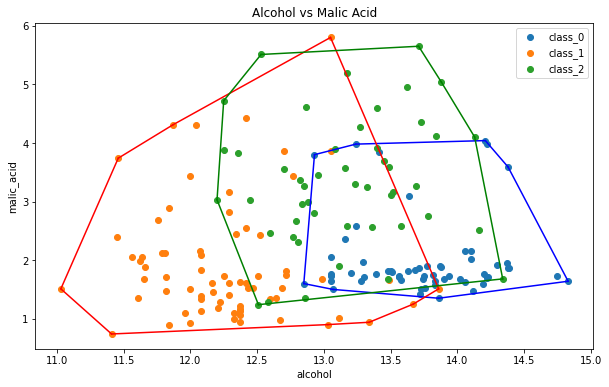

In [18]:
data = datasets.load_wine()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Malic Acid')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = hullfinal(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
plt.legend()

(569, 31)
 
 


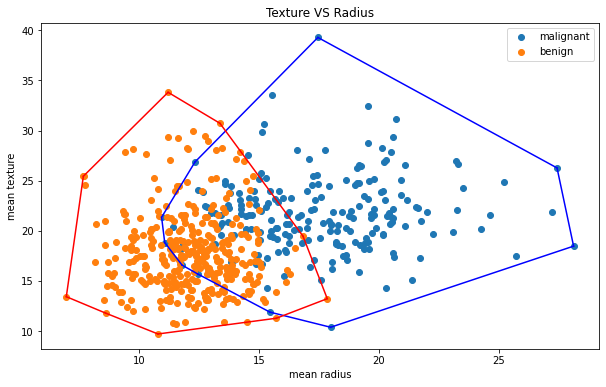

In [19]:
data = datasets.load_breast_cancer()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Texture VS Radius')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = hullfinal(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
    plt.legend()